<a href="https://colab.research.google.com/github/nescoba/DIP/blob/main/CTMC_scheme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [343]:
def intensity(x):
    return 0.5 + np.power(x,2)

v_intens = np.vectorize(intensity)

In [347]:
h = 0.01
M = 100
L = 1000000*M

In [218]:
# def scheme():
#     x=[0]
#     y = []

#     for m in range(1, 100*M):
#         y_new = np.random.choice([0,1], p=[1 - h, h])
#         y.append(y_new)

#     Y = np.cumsum(y)

#     for m in range(1, M):
#         argum = 0
#         for n in range(m):
#             argum += intensity(x[n])*h    
#         x_new = Y[int(argum/h)]
#         x.append(x_new)

#     x = np.vstack(x)
#     x = x[:, 0]
#     x = pd.Series(x, index=np.arange(start=0, step=h, stop=M*h))

#     phi = pd.Series(x/M, index=x.index/M) 

#     return [x.loc[1],  - phi.loc[1]/(5*h/M)]

In [ ]:
# phi.loc[1 + 5*h/M]

In [42]:
# for n in range(1000):
#     print(scheme())

----

In [293]:
y = np.random.choice([0,1], p=[1 - h, h], size=(L-1))

Y = pd.Series(np.cumsum(y), index=np.arange(start=h, stop=L*h, step=h))

In [294]:
Y

0.01          0
0.02          0
0.03          0
0.04          0
0.05          0
           ... 
1999.95    1974
1999.96    1974
1999.97    1974
1999.98    1974
1999.99    1974
Length: 199999, dtype: int64

In [302]:
x = pd.Series([0], index=[0])
for m in range(1, M):
    argum = 0
    for n in range(m):
        argum += intensity(x.loc[n*h])*h    
    x_new = Y.iloc[int(argum/h)]
    x.loc[m*h] = x_new

x

0.00    0
0.01    0
0.02    0
0.03    0
0.04    0
       ..
0.95    7
0.96    7
0.97    7
0.98    7
0.99    7
Length: 100, dtype: int64

In [303]:
N = 20

z = pd.Series([0], index=[0])
for m in range(1, M):
    argum = 0
    for n in range(m):
        argum += intensity(x.loc[n*h])*h    
    z_new = Y.iloc[int(argum/h)*N]
    z.loc[m*h] = z_new

phi = pd.Series(z/N, index=z.index)
phi

0.00    0.00
0.01    0.05
0.02    0.10
0.03    0.20
0.04    0.25
        ... 
0.95    7.40
0.96    7.50
0.97    7.55
0.98    7.55
0.99    7.75
Length: 100, dtype: float64

In [269]:
[x.loc[0.5], (phi.loc[0.5+0.1] - phi.loc[0.5])/0.1]

[0, 5.499999999999998]

------

In [332]:
def scheme_corrected():

    y = np.random.choice([0,1], p=[1 - h, h], size=(L-1))
        
    Y = pd.Series(np.cumsum(y), index=np.arange(start=h, stop=L*h, step=h))

    x = pd.Series([0], index=[0])
    for m in range(1, M):
        argum = 0
        for n in range(m):
            argum += intensity(x.loc[n*h])*h    
        x_new = Y.iloc[int(argum/h)]
        x.loc[m*h] = x_new

    
    N = 20

    z = pd.Series([0], index=[0])
    for m in range(1, M):
        argum = 0
        for n in range(m):
            argum += intensity(x.loc[n*h])*h    
        z_new = Y.iloc[int(argum/h)*N]
        z.loc[m*h] = z_new

    phi = pd.Series(z/N, index=z.index)
    
    return pd.DataFrame({'x':[x.loc[0.5]], 'lambda': [(phi.loc[0.5+0.1] - phi.loc[0.5])/0.1]})

In [349]:
data = pd.DataFrame(columns=['x', 'lambda'])
for n in range(25):
    new_data = scheme_corrected()
    print(n)
    data = pd.concat([data, new_data])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [350]:
data

,x,lambda
0,3,7.5
0,0,0.5
0,0,0.5
0,0,1.0
0,0,0.5
0,0,0.0
0,0,0.0
0,0,0.5
0,0,1.0
0,0,1.0


In [351]:
info = data.groupby('x')['lambda'].mean()

In [352]:
info

x
0    0.527778
1    1.875000
2    3.500000
3    7.500000
Name: lambda, dtype: float64

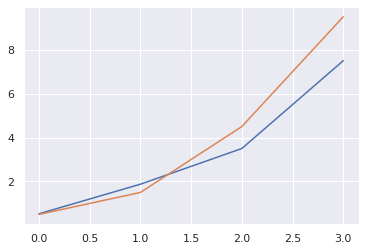

In [353]:
plt.plot(info[:])
plt.plot(info.index, v_intens(info.index))